In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv("../.env")
DATASET_PATH=os.getenv("DATASET_DIRECTORY")
MODEL_TRAINING_DATASET_PATH=os.getenv("MODEL_TRAINING_DATASET_PATH")
GENERATED_DATASETS_PATH=os.getenv("GENERATED_DATASETS_PATH")


sys.path.append("../")
from cpsl_datasets.gnn_node_ds import GnnNodeDS

from mmwave_model_integrator.input_encoders._node_encoder import _NodeEncoder
from mmwave_model_integrator.ground_truth_encoders._gt_node_encoder import _GTNodeEncoder
from mmwave_model_integrator.plotting.plotter_gnn_pc_processing import PlotterGnnPCProcessing


/home/david/.cache/pypoetry/virtualenvs/odometry-JJ4jnFPp-py3.10/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#initialize the dataset
dataset_path = os.path.join(DATASET_PATH,"gnn_train")
dataset = GnnNodeDS(
    dataset_path=dataset_path,
    node_folder="nodes",
    label_folder="labels"
)
print(dataset_path)

found 393 node samples
found 393 label samples
/data/radnav/radnav_model_train_datasets/gnn_train


In [3]:
#initialize the encoder and decoder
input_encoder = _NodeEncoder()
ground_truth_encoder = _GTNodeEncoder()
plotter = PlotterGnnPCProcessing()

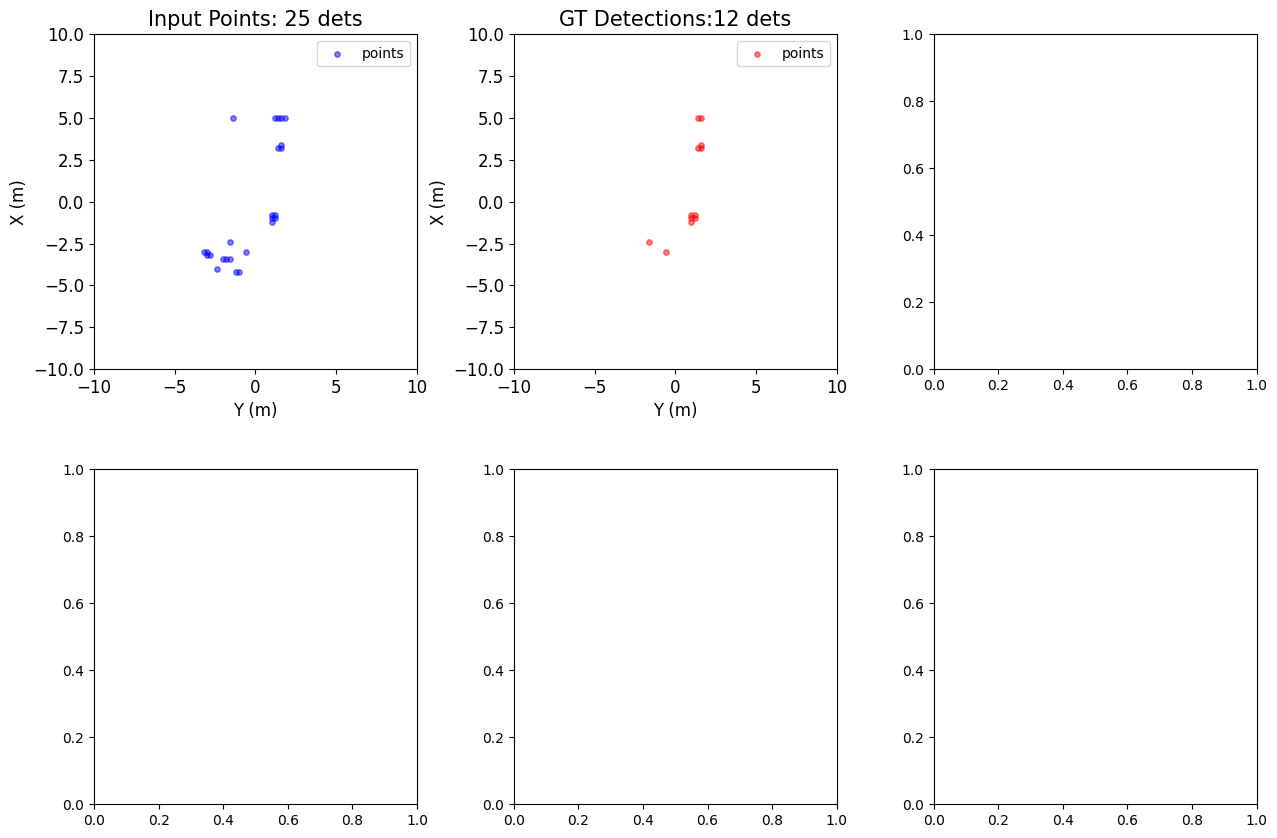

In [4]:
#plot a sample from the training dataset
nodes = dataset.get_node_data(idx=1)
labels = dataset.get_label_data(idx=1)

plotter.plot_compilation(
    nodes=nodes,
    labels=labels,
    input_encoder=input_encoder,
    ground_truth_encoder=ground_truth_encoder,
    show=True
)

In [5]:
from mmwave_model_integrator.config import Config
import mmwave_model_integrator.torch_training.trainers as trainers

config_path = "../configs/sage_gnn_base.py"
config = Config(config_path)

config.print_config()

trainer_config = config.trainer
trainer_class = getattr(trainers,trainer_config.pop('type'))
trainer = trainer_class(**trainer_config)

model=dict(
    type=SageGNNClassifier,
    in_channels=4,
    hidden_channels=16,
    out_channels=1,
),
generated_dataset=dict(
    input_encoding_folder=nodes,
    ground_truth_encoding_folder=labels,
    generated_dataset_path=/data/radnav/radnav_model_train_datasets/gnn_train,
),
trainer=dict(
    type=GNNTorchTrainer,
    model=dict(
        type=SageGNNClassifier,
        in_channels=4,
        hidden_channels=16,
        out_channels=1,
    ),
    optimizer=dict(
        type=Adam,
        lr=0.001,
    ),
    loss_fn=dict(
        type=BCELoss,
    ),
    dataset=dict(
        type=_GnnNodeDataset,
        edge_radius=10.0,
        transforms=[],
    ),
    data_loader=dict(
        type=TGDataLoader,
        batch_size=64,
        shuffle=True,
        num_workers=4,
    ),
    dataset_path=/data/radnav/radnav_model_train_datasets/gnn_train,
    node_directory=nodes,
    label_directory=labels,
    val_split=0.25,
    working_dir=working_dir,
    save_name=Sage_GNN,
    epoch

ModelTrainer.train: training the network...


  5%|▌         | 1/20 [00:05<01:41,  5.32s/it]

EPOCH: 1/20
	 Train loss: 0.8576588034629822, Val loss:1.36664879322052


 10%|█         | 2/20 [00:10<01:37,  5.39s/it]

EPOCH: 2/20
	 Train loss: 0.8503080606460571, Val loss:1.3555455207824707


 15%|█▌        | 3/20 [00:16<01:30,  5.34s/it]

EPOCH: 3/20
	 Train loss: 0.8447765707969666, Val loss:1.3504488468170166


 20%|██        | 4/20 [00:21<01:25,  5.33s/it]

EPOCH: 4/20
	 Train loss: 0.8385440111160278, Val loss:1.3413939476013184


 25%|██▌       | 5/20 [00:26<01:20,  5.35s/it]

EPOCH: 5/20
	 Train loss: 0.8345955014228821, Val loss:1.336733102798462


 30%|███       | 6/20 [00:31<01:14,  5.31s/it]

EPOCH: 6/20
	 Train loss: 0.8291574716567993, Val loss:1.3241989612579346


 35%|███▌      | 7/20 [00:37<01:08,  5.29s/it]

EPOCH: 7/20
	 Train loss: 0.823954164981842, Val loss:1.3242852687835693


 40%|████      | 8/20 [00:42<01:03,  5.29s/it]

EPOCH: 8/20
	 Train loss: 0.8207600712776184, Val loss:1.3110946416854858


 45%|████▌     | 9/20 [00:47<00:57,  5.26s/it]

EPOCH: 9/20
	 Train loss: 0.8175050020217896, Val loss:1.3111989498138428


 50%|█████     | 10/20 [00:53<00:52,  5.29s/it]

EPOCH: 10/20
	 Train loss: 0.8119436502456665, Val loss:1.3035495281219482


 55%|█████▌    | 11/20 [00:58<00:47,  5.30s/it]

EPOCH: 11/20
	 Train loss: 0.8073887825012207, Val loss:1.2983269691467285


 60%|██████    | 12/20 [01:03<00:42,  5.29s/it]

EPOCH: 12/20
	 Train loss: 0.8041868209838867, Val loss:1.2857880592346191


 65%|██████▌   | 13/20 [01:08<00:37,  5.30s/it]

EPOCH: 13/20
	 Train loss: 0.7988652586936951, Val loss:1.280397653579712


 70%|███████   | 14/20 [01:14<00:31,  5.28s/it]

EPOCH: 14/20
	 Train loss: 0.7971512079238892, Val loss:1.2789199352264404


 75%|███████▌  | 15/20 [01:19<00:26,  5.29s/it]

EPOCH: 15/20
	 Train loss: 0.7902747392654419, Val loss:1.2627304792404175


 80%|████████  | 16/20 [01:24<00:21,  5.27s/it]

EPOCH: 16/20
	 Train loss: 0.7871048450469971, Val loss:1.2613224983215332


 85%|████████▌ | 17/20 [01:30<00:15,  5.31s/it]

EPOCH: 17/20
	 Train loss: 0.7835618257522583, Val loss:1.2560820579528809


 90%|█████████ | 18/20 [01:35<00:10,  5.33s/it]

EPOCH: 18/20
	 Train loss: 0.7761051654815674, Val loss:1.248673677444458


 95%|█████████▌| 19/20 [01:40<00:05,  5.35s/it]

EPOCH: 19/20
	 Train loss: 0.7728328704833984, Val loss:1.236378788948059


100%|██████████| 20/20 [01:46<00:00,  5.31s/it]

EPOCH: 20/20
	 Train loss: 0.7693887948989868, Val loss:1.235931634902954
ModelTrainer.train: total training time 106.24


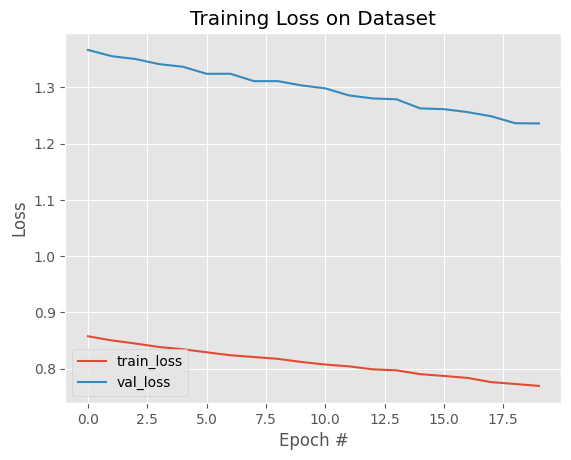

In [6]:
trainer.train_model()